# Covid 19 Data Analysis

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import requests 
from bs4 import BeautifulSoup
import json
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 45,614,624 Cases and 1,189,689 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x5
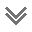

In [43]:
web_page=requests.get("https://www.worldometers.info/coronavirus")
soup=BeautifulSoup(web_page.text,'html.parser')
print(soup.prettify())

In [44]:
covid_Data=soup.find_all("div",class_="maincounter-number")
print("Coronavirus Cases: ",covid_Data[0].text.strip())
print("Total number of death: ",covid_Data[1].text.strip())
print("Recovered: ",covid_Data[2].text.strip())
data=soup.find_all("script",{"type":"text/javascript"})
##for content in data:
##    print(content)

Coronavirus Cases:  45,614,624
Total number of death:  1,189,689
Recovered:  33,089,761


In [45]:
result=soup.find(id="main_table_countries_today")
content=result.find_all("td")

In [46]:
clean_data=""
for data in content:
    clean_data+=data.text.strip()+ "|"
    clean_data=clean_data.replace("+","")
    clean_data=clean_data.replace("N/A","0")
#clean_data

In [47]:
import re
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]



for c in countries:
    pattern=c+"[,|\d]*"
    data=re.search(pattern,clean_data,re.IGNORECASE)
    if data is not None:
        print(data.group())

USA|9,238,900|26,133|234,517|340|5,988,726|5,381|3,015,657|16,931|27,858|707|141,927,080|427,952|331,642,770|
Spain|1,238,922||35,639||0|0|0|2,404|26,495|762|16,690,076|356,925|46,760,790|
Italy|647,674|31,084|38,321|199|283,567|4,285|325,786|1,746|10,717|634|15,568,575|257,620|60,432,243|
France|1,282,769||36,020||115,287||1,131,462|3,156|19,638|551|15,592,956|238,711|65,321,359|
Germany|513,147|14,794|10,501|66|345,700|6,500|156,946|1,696|6,118|125|21,882,967|260,907|83,872,585|
UK|989,745|24,405|46,229|274|0|0|0|975|14,554|680|33,470,217|492,182|68,003,706|
Turkey|373,154|2,322|10,177|78|322,465|1,703|40,512|1,966|4,409|120|13,877,705|163,968|84,636,500|
Iran|604,952|8,011|34,478|365|477,300|4,702|93,174|5,128|7,172|409|4,892,704|58,009|84,344,353|
Russia|1,599,976|18,283|27,656|355|1,200,560|14,519|371,760|2,300|10,962|189|59,866,561|410,171|145,955,236|
Brazil|5,499,875|3,473|159,104|71|4,954,159||386,612|8,318|25,814|747|21,900,000|102,789|213,056,940|
Canada|230,547|2,005|10,100

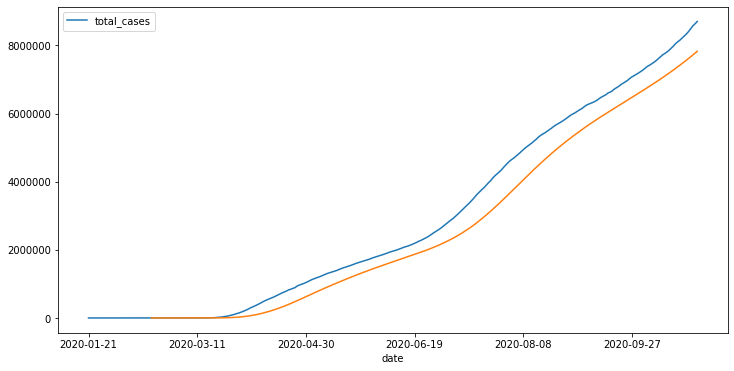

In [48]:
df=pd.read_csv("owid-covid-data.csv")
df.columns
country_df=df.location.unique()
indexer=df[df["location"]=="United States"].index
us_tc=df.loc[indexer,"date":"total_cases"]
us_tc.dropna(inplace=True)
us_tc.set_index("date",inplace=True)
us_tc.plot(figsize=(12,6))
us_tc.rolling(window=30).mean()["total_cases"].plot()

In [49]:
df.head()

iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13          2.0        2.0   
1      ABW  North America    Aruba  2020-03-19          NaN        NaN   
2      ABW  North America    Aruba  2020-03-20          4.0        2.0   
3      ABW  North America    Aruba  2020-03-21          NaN        NaN   
4      ABW  North America    Aruba  2020-03-22          NaN        NaN   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1               0.286           NaN         NaN                  0.0  ...   
2               0.286           NaN         0.0                  0.0  ...   
3               0.286           NaN         NaN                  0.0  ...   
4               0.286           NaN         NaN                  0.0  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0       35973.781              NaN                    NaN   
1       35973.781              NaN                    NaN   
2       35973.781              NaN                    NaN   
3       35973.781              NaN                    NaN   
4       35973.781              NaN                    NaN   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                11.62             NaN           NaN                     NaN   
1                11.62             NaN           NaN                     NaN   
2                11.62             NaN           NaN                     NaN   
3                11.62             NaN           NaN                     NaN   
4                11.62             NaN           NaN                     NaN   

   hospital_beds_per_thousand  life_expectancy  human_development_index  
0                         NaN            76.29                      NaN  
1                         NaN            76.29                      NaN  
2                         NaN            76.29                      NaN  
3                         NaN            76.29                      NaN  
4                         NaN            76.29                      NaN  

[5 rows x 41 columns]

 
## Do lockdowns work?

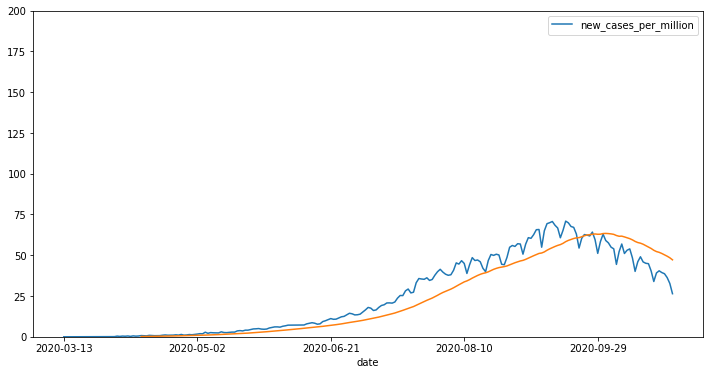

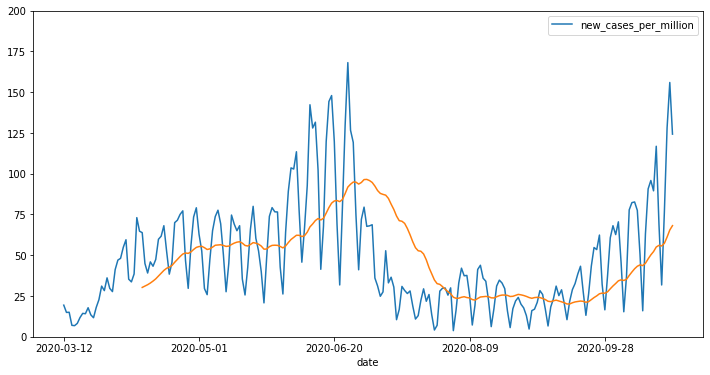

In [50]:
def plot_covid_data(country,col,plot_ma=False,y_max=200):
    indexer=df[df["location"]==country].index
    country_df=df.loc[indexer,"date":col]
    country_df.dropna(inplace=True)
    country_df.set_index("date",inplace=True)
    country_df.drop(country_df.columns.difference([col]),1,inplace=True)
    country_df.plot(figsize=(12,6),ylim=[0,y_max])
    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
plot_covid_data("India","new_cases_per_million",True)
plot_covid_data("Sweden","new_cases_per_million",True)

## How Does Median Age Effect Death Rate?

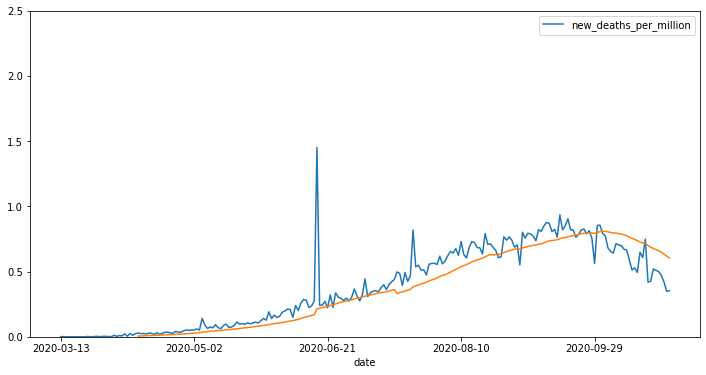

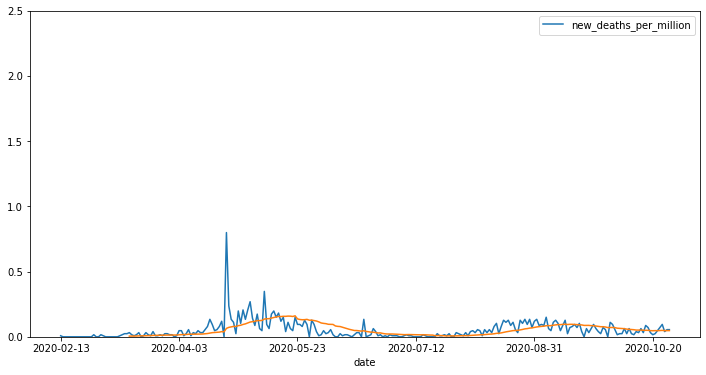

In [51]:
plot_covid_data("India","new_deaths_per_million",True,2.5)
plot_covid_data("Japan","new_deaths_per_million",True,2.5)

## How Does Obesity Effect Death Rate?

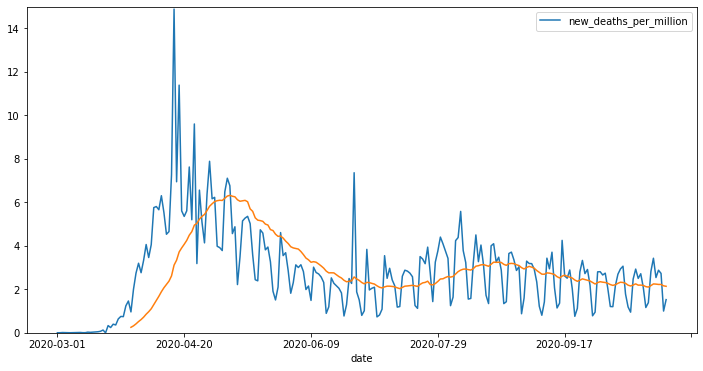

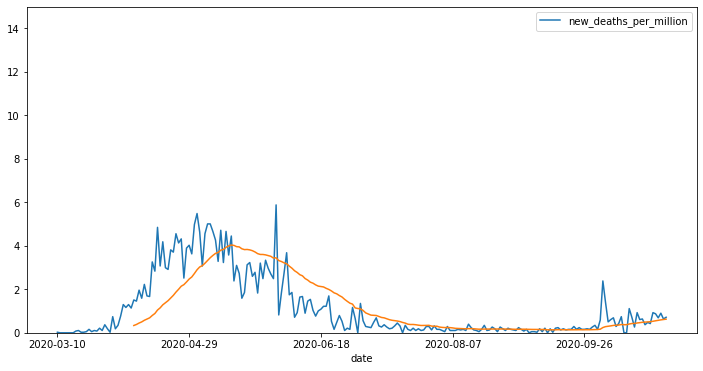

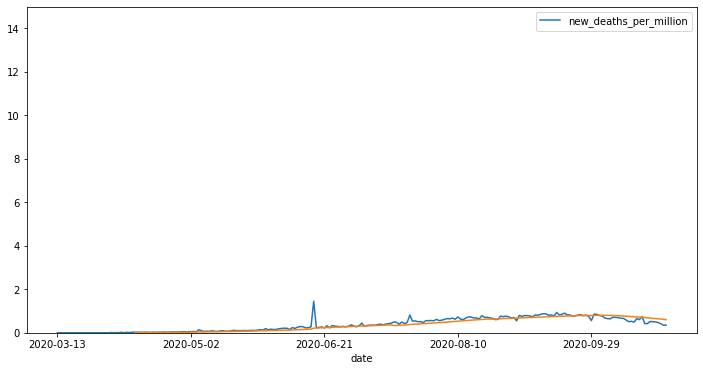

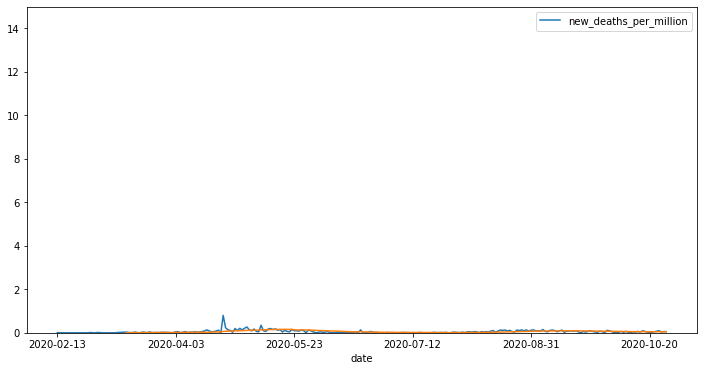

In [52]:
plot_covid_data("United States","new_deaths_per_million",True,15)
plot_covid_data("Canada","new_deaths_per_million",True,15)
plot_covid_data("India","new_deaths_per_million",True,15)
plot_covid_data("Japan","new_deaths_per_million",True,15)


## Does More Testing Slow Deathrate?

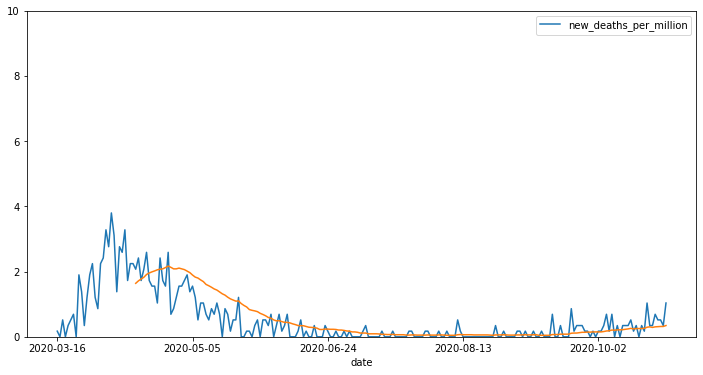

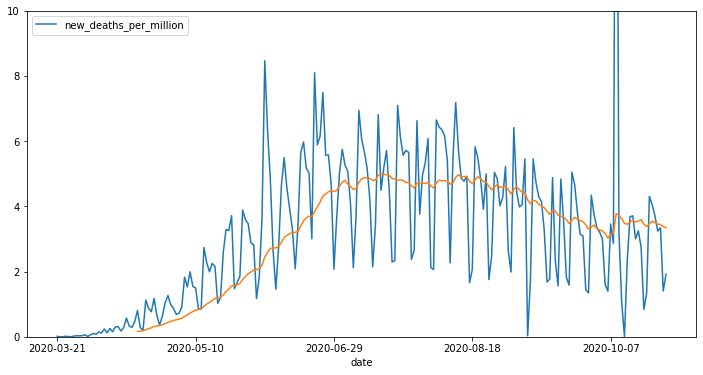

In [54]:
plot_covid_data('Denmark', 'new_deaths_per_million', True, 10)

plot_covid_data('Mexico', 'new_deaths_per_million', True, 10)

In [53]:
def scatter_plot(date,col1,col2):
    tot_df=pd.DataFrame(columns=["date","location",col1,col2])
    for c in country_df:
        temp_df=df[(df["location"]==c)& (df["date"]==date)][["date","location",col1,col2]]
        tot_df=tot_df.append(temp_df,ignore_index=True).fillna(0)
    tot_df.set_index('date',inplace=True)
    fig=px.scatter(data_frame=tot_df,x=col2,y=col1,color="location",trendline="ols",hover_data=["location"])
    fig.show()
    return tot_df
scatter_plot("2020-10-27","total_deaths_per_million","aged_70_older")

location  total_deaths_per_million  aged_70_older
date                                                              
2020-10-27          Aruba                   337.186          7.452
2020-10-27    Afghanistan                    39.097          1.337
2020-10-27         Angola                     8.154          1.362
2020-10-27       Anguilla                     0.000          0.000
2020-10-27        Albania                   166.794          8.643
...                   ...                       ...            ...
2020-10-27   South Africa                   320.493          3.053
2020-10-27         Zambia                    18.930          1.542
2020-10-27       Zimbabwe                    16.282          1.882
2020-10-27          World                   148.945          5.355
2020-10-27  International                     0.000          0.000

[210 rows x 3 columns]